In [1]:
import numpy as np
import pandas as pd
import pickle

from utils import get_image_arrays, get_image_predictions, show_image

In [2]:
image_path = '/Users/amansolanki/datasets/hateful-memes-images/'
test_seen_original = pd.read_csv('/Users/amansolanki/PycharmProjects/hateful-memes-challenge/data/test_seen.csv')
TFLITE_FILE_PATH = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/image/image_model.tflite'
test_seen = test_seen_original.sample(1)
y_true = test_seen['label']
image_id = test_seen['image_id']
text = test_seen['text']

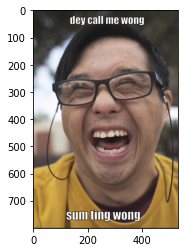

In [3]:
# Image
show_image(image_id, image_path)

In [4]:
# Image Unimodel
image_array = get_image_arrays(image_id, image_path)
image_prediction = get_image_predictions(image_array, TFLITE_FILE_PATH)
y_pred_image = np.argmax(image_prediction, axis=1)
print('Image Prediction Probabilities:')
print(image_prediction)

Image Prediction Probabilities:
[[0.7448776 0.3343253]]


In [5]:
# TFIDF Text Unimodal Model
model = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/text/tfidf_model.pickle'
vectorizer = '/Users/amansolanki/PycharmProjects/hateful-memes-challenge/src/text/tfidf_vectorizer.pickle'
tfidf_model = pickle.load(open(model, 'rb'))
tfidf_vectorizer = pickle.load(open(vectorizer, 'rb'))
transformed_text = tfidf_vectorizer.transform(text)
text_prediction = tfidf_model.predict_proba(transformed_text)
y_pred_text = np.argmax(text_prediction, axis=1)
print('Text Prediction Probabilities:')
print(text_prediction)

Text Prediction Probabilities:
[[0.70911179 0.29088821]]


In [6]:
# Ensemble Probabilities
ensemble_prediction = np.mean(np.array([image_prediction, text_prediction]), axis=0)
y_pred_ensemble = np.argmax(ensemble_prediction, axis=1)
print('Ensemble Prediction Probabilities:')
print(ensemble_prediction)

Ensemble Prediction Probabilities:
[[0.72699468 0.31260676]]


In [7]:
print('True Label: ', list(dict(y_true).values())[0])
print('Predicted Label: ', y_pred_ensemble[0])

True Label:  1
Predicted Label:  0
